# Sentiment Analysis con KNN
## Clasificador en C++ 💪💪
Vamos a probar a nuestro bichito


Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [1]:
!cd .. && git submodule init
!cd .. && git submodule update
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: build: File exists
-- The C compiler identification is AppleClang 10.0.0.10001145
-- The CXX compiler identification is AppleClang 10.0.0.10001145
-- Check for working C compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/cc
-- Check for working C compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/c++
-- Check for working CXX compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import sentiment


/Users/vpomsztein/Documents/PrivateRepositories/SentimentAnalysisMetNum/notebooks
Python 3.6.5 :: Anaconda, Inc.


In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

!cd ../data && tar -xvf *.tgz

df = pd.read_csv("../data/imdb_small.csv", index_col=0)

print("Cantidad de documentos: {}".format(df.shape[0]))

x ./._imdb_small.csv
x imdb_small.csv
Cantidad de documentos: 12500


In [4]:
df.describe()

type                                             review  label  \
count   12500                                              12500  12500   
unique      2                                              12469      2   
top      test  The unthinkable has happened. Having first wit...    neg   
freq     6275                                                  2   6322   

               file  
count         12500  
unique        12085  
top     5609_10.txt  
freq              2

In [5]:
text_train = df[df.type == 'train']["review"]
label_train = df[df.type == 'train']["label"]

text_test = df[df.type == 'test']["review"]
label_test = df[df.type == 'test']["label"]

print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
print("Cantidad de instancias de test = {}".format(len(text_test)))



Cantidad de instancias de entrenamiento = 6225
Cantidad de instancias de test = 6275


In [6]:
from __future__ import division
print("Class balance : {} pos {} neg".format(
    (label_train == 'pos').sum() / label_train.shape[0], 
    (label_train == 'neg').sum() / label_train.shape[0]
))


Class balance : 0.49493975903614457 pos 0.5050602409638554 neg


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)

vectorizer.fit(text_train)

X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values

In [8]:
import sentiment
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import calendar;
import time;

def getMetrics(predictions, actualValues):
    tp = np.sum( np.logical_and(predictions == 1, actualValues == 1) )
    tn = np.sum( np.logical_and(predictions == 0, actualValues == 0) )
    fp = np.sum( np.logical_and(predictions == 1, actualValues == 0) )
    fn = np.sum( np.logical_and(predictions == 0, actualValues == 1) )

    acc = (tp + tn) / (tp+tn+fp+fn)
    if (tp + fp) == 0:
        prec = 0
    else:
        prec = tp / (tp + fp)
    if (tp + fn) == 0:
        rec = 0
    else:
        rec = tp / (tp + fn)
    return acc, prec, rec

def saveData(filename, data):
    ts = calendar.timegm(time.gmtime())
    np.savetxt("{}_{}.csv".format(ts, filename), data, delimiter=",")
    
print("Done! You're a good boy 🐶")

Done! You're a good boy 🐶


In [ ]:
%%time

# Esta celda puede ser ejecutada sólo cuando se quiere probar PCA
pca = sentiment.PCA(50)
pca.fit(X_train)

In [ ]:

# Idem anterior!

pca_x_train = pca.transform(X_train)
pca_x_test = pca.transform(X_test)

In [ ]:
%%time

# Descomentar la implementación deseada:
# Uncomment this for KNN only (PCA disabled):
# clf = sentiment.KNNClassifier(100)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test[:500])
# acc = accuracy_score(y_test[:500], y_pred[:500])

# Uncomment this for PCA enabled:
clf = sentiment.KNNClassifier(550)
clf.fit(pca_x_train, y_train)

y_pred = clf.predict(pca_x_test)

acc, prec, rec = getMetrics(y_pred, y_test)

print(acc, prec, rec)

In [10]:
## ==================== Experimento 1 ========================
## Análisis de calidad de resultados en base a k y alpha

## Analizo la variación de las métricas en funcion de k

K_vals = np.arange(0,1000,50)
K_vals[0] = 1
mets = np.zeros((len(K_vals), 3))
               
for i,k in enumerate(K_vals):
#     pca = sentiment.PCA(a)
#     pca.fit(X_train[:1000])
#     Xtc_train = pca.transform(X_train[:1000])
#     Xtc_test = pca.transform(X_test[:1000])
    
    clf = sentiment.KNNClassifier(k)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc, prec, rec = getMetrics(preds, y_test)
    mets[i] = [acc, prec, rec]
    print("Finished {}".format(k))

Finished 1
Finished 50
Finished 100
Finished 150
Finished 200
Finished 250
Finished 300
Finished 350
Finished 400
Finished 450
Finished 500
Finished 550
Finished 600
Finished 650
Finished 700
Finished 750
Finished 800
Finished 850
Finished 900
Finished 950


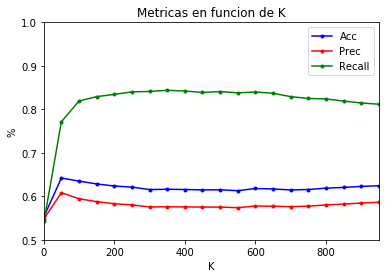

In [12]:
plt.plot(K_vals,mets[:,0], 'b.-')
plt.plot(K_vals,mets[:,1], 'r.-')
plt.plot(K_vals,mets[:,2], 'g.-')
plt.title("Metricas en funcion de K")
plt.xlabel("K")
plt.ylabel("%")
plt.axis([1, K_vals[-1], 0.5, 1])
plt.gca().legend(('Acc','Prec','Recall'))

saveData("knn1-1000step50NoAlpha", mets)

In [ ]:
## Analizo la variación de las métricas en funcion de alpha para K fijo

alphas = np.arange(0,500,50)
alphas[0] = 1
K_vals_fixes = np.array([50,550,1100])

dmets = { i : np.zeros((len(alphas), 3)) for i in K_vals_fixes}
dmets

In [ ]:
print("Beginning alpha metric calculations")

for i,a in enumerate(alphas):
    
    pca = sentiment.PCA(a)
    pca.fit(X_train)
    Xtc_train = pca.transform(X_train)
    Xtc_test = pca.transform(X_test)
    print("Finished training PCA {}".format(a))

    for j, k in enumerate(K_vals_fixes):
        clf = sentiment.KNNClassifier(k)
        clf.fit(Xtc_train, y_train)
        preds = clf.predict(Xtc_test)
        acc, prec, rec = getMetrics(preds, y_test)
        mets = dmets[k]
        mets[i] = [acc, prec, rec]
        print("Finished {}, alpha = {}".format(k, a))


## Metricas para PCA:

line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-']
for j,k in enumerate(K_vals_fixes):
    mets = dmets[k]

    plt.subplot(3, 1, 1)
    plt.plot(alphas,mets[:,0], line_styles[j])
    plt.ylabel("Acc")
    plt.xticks([])

    plt.subplot(3, 1, 2)
    plt.plot(alphas,mets[:,1], line_styles[j])
    plt.ylabel("Prec")
    plt.xticks([])
    
    plt.subplot(3, 1, 3)
    plt.plot(alphas,mets[:,2], line_styles[j])
    plt.ylabel("Rec")
    plt.xticks([])

    
plt.xlabel("alpha")
plt.xticks(alphas)
plt.axis([1, alphas[-1], 0.3, 0.8])
plt.gca().legend([str(i) for i in K_vals_fixes])

In [ ]:
a = np.random.random((1200, 500))

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-1, 1200), np.linspace(1, 500))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

# plt.show()

# plt.imshow(a, cmap='hot', interpolation='nearest')
# plt.show()
dmets
y

In [ ]:
for i in range(15, 0, -1): # <--Delete me
    print(i)
    pca = sentiment.PCA(min(i, 50))
    pca.fit(X_train[:i])
    Xtc_train = pca.transform(X_train[:i])
    Ytc_train = y_train[:i]
    Xtc_test = pca.transform(X_test)
    
    for k in range(min(i, 50), 0, -1): # <--Delete me
        clf = sentiment.KNNClassifier(k)

Will have 52 trainSize instances
Will have 50 knn instances
Finished training PCA train_size = 6225
Finished k = 2500, train_size = 6225
Finished k = 2450, train_size = 6225
Finished k = 2400, train_size = 6225
Finished k = 2350, train_size = 6225
Finished k = 2300, train_size = 6225
Finished k = 2250, train_size = 6225
Finished k = 2200, train_size = 6225
Finished k = 2150, train_size = 6225
Finished k = 2100, train_size = 6225
Finished k = 2050, train_size = 6225
Finished k = 2000, train_size = 6225
Finished k = 1950, train_size = 6225
Finished k = 1900, train_size = 6225
Finished k = 1850, train_size = 6225
Finished k = 1800, train_size = 6225
Finished k = 1750, train_size = 6225
Finished k = 1700, train_size = 6225
Finished k = 1650, train_size = 6225
Finished k = 1600, train_size = 6225
Finished k = 1550, train_size = 6225
Finished k = 1500, train_size = 6225
Finished k = 1450, train_size = 6225
Finished k = 1400, train_size = 6225
Finished k = 1350, train_size = 6225
Finished k =

Finished k = 1650, train_size = 5745
Finished k = 1600, train_size = 5745
Finished k = 1550, train_size = 5745
Finished k = 1500, train_size = 5745
Finished k = 1450, train_size = 5745
Finished k = 1400, train_size = 5745
Finished k = 1350, train_size = 5745
Finished k = 1300, train_size = 5745
Finished k = 1250, train_size = 5745
Finished k = 1200, train_size = 5745
Finished k = 1150, train_size = 5745
Finished k = 1100, train_size = 5745
Finished k = 1050, train_size = 5745
Finished k = 1000, train_size = 5745
Finished k = 950, train_size = 5745
Finished k = 900, train_size = 5745
Finished k = 850, train_size = 5745
Finished k = 800, train_size = 5745
Finished k = 750, train_size = 5745
Finished k = 700, train_size = 5745
Finished k = 650, train_size = 5745
Finished k = 600, train_size = 5745
Finished k = 550, train_size = 5745
Finished k = 500, train_size = 5745
Finished k = 450, train_size = 5745
Finished k = 400, train_size = 5745
Finished k = 350, train_size = 5745
Finished k = 3

Finished k = 650, train_size = 5265
Finished k = 600, train_size = 5265
Finished k = 550, train_size = 5265
Finished k = 500, train_size = 5265
Finished k = 450, train_size = 5265
Finished k = 400, train_size = 5265
Finished k = 350, train_size = 5265
Finished k = 300, train_size = 5265
Finished k = 250, train_size = 5265
Finished k = 200, train_size = 5265
Finished k = 150, train_size = 5265
Finished k = 100, train_size = 5265
Finished k = 50, train_size = 5265
Finished training PCA train_size = 5145
Finished k = 2500, train_size = 5145
Finished k = 2450, train_size = 5145
Finished k = 2400, train_size = 5145
Finished k = 2350, train_size = 5145
Finished k = 2300, train_size = 5145
Finished k = 2250, train_size = 5145
Finished k = 2200, train_size = 5145
Finished k = 2150, train_size = 5145
Finished k = 2100, train_size = 5145
Finished k = 2050, train_size = 5145
Finished k = 2000, train_size = 5145
Finished k = 1950, train_size = 5145
Finished k = 1900, train_size = 5145
Finished k =

Finished k = 2200, train_size = 4665
Finished k = 2150, train_size = 4665
Finished k = 2100, train_size = 4665
Finished k = 2050, train_size = 4665
Finished k = 2000, train_size = 4665
Finished k = 1950, train_size = 4665
Finished k = 1900, train_size = 4665
Finished k = 1850, train_size = 4665
Finished k = 1800, train_size = 4665
Finished k = 1750, train_size = 4665
Finished k = 1700, train_size = 4665
Finished k = 1650, train_size = 4665
Finished k = 1600, train_size = 4665
Finished k = 1550, train_size = 4665
Finished k = 1500, train_size = 4665
Finished k = 1450, train_size = 4665
Finished k = 1400, train_size = 4665
Finished k = 1350, train_size = 4665
Finished k = 1300, train_size = 4665
Finished k = 1250, train_size = 4665
Finished k = 1200, train_size = 4665
Finished k = 1150, train_size = 4665
Finished k = 1100, train_size = 4665
Finished k = 1050, train_size = 4665
Finished k = 1000, train_size = 4665
Finished k = 950, train_size = 4665
Finished k = 900, train_size = 4665
Fin

Finished k = 1200, train_size = 4185
Finished k = 1150, train_size = 4185
Finished k = 1100, train_size = 4185
Finished k = 1050, train_size = 4185
Finished k = 1000, train_size = 4185
Finished k = 950, train_size = 4185
Finished k = 900, train_size = 4185
Finished k = 850, train_size = 4185
Finished k = 800, train_size = 4185
Finished k = 750, train_size = 4185
Finished k = 700, train_size = 4185
Finished k = 650, train_size = 4185
Finished k = 600, train_size = 4185
Finished k = 550, train_size = 4185
Finished k = 500, train_size = 4185
Finished k = 450, train_size = 4185
Finished k = 400, train_size = 4185
Finished k = 350, train_size = 4185
Finished k = 300, train_size = 4185
Finished k = 250, train_size = 4185
Finished k = 200, train_size = 4185
Finished k = 150, train_size = 4185
Finished k = 100, train_size = 4185
Finished k = 50, train_size = 4185
Finished training PCA train_size = 4065
Finished k = 2500, train_size = 4065
Finished k = 2450, train_size = 4065
Finished k = 2400,

Finished k = 200, train_size = 3705
Finished k = 150, train_size = 3705
Finished k = 100, train_size = 3705
Finished k = 50, train_size = 3705
Finished training PCA train_size = 3585
Finished k = 2500, train_size = 3585
Finished k = 2450, train_size = 3585
Finished k = 2400, train_size = 3585
Finished k = 2350, train_size = 3585
Finished k = 2300, train_size = 3585
Finished k = 2250, train_size = 3585
Finished k = 2200, train_size = 3585
Finished k = 2150, train_size = 3585
Finished k = 2100, train_size = 3585
Finished k = 2050, train_size = 3585
Finished k = 2000, train_size = 3585
Finished k = 1950, train_size = 3585
Finished k = 1900, train_size = 3585
Finished k = 1850, train_size = 3585
Finished k = 1800, train_size = 3585
Finished k = 1750, train_size = 3585
Finished k = 1700, train_size = 3585
Finished k = 1650, train_size = 3585
Finished k = 1600, train_size = 3585
Finished k = 1550, train_size = 3585
Finished k = 1500, train_size = 3585
Finished k = 1450, train_size = 3585
Fin

Finished k = 1750, train_size = 3105
Finished k = 1700, train_size = 3105
Finished k = 1650, train_size = 3105
Finished k = 1600, train_size = 3105
Finished k = 1550, train_size = 3105
Finished k = 1500, train_size = 3105
Finished k = 1450, train_size = 3105
Finished k = 1400, train_size = 3105
Finished k = 1350, train_size = 3105
Finished k = 1300, train_size = 3105
Finished k = 1250, train_size = 3105
Finished k = 1200, train_size = 3105
Finished k = 1150, train_size = 3105
Finished k = 1100, train_size = 3105
Finished k = 1050, train_size = 3105
Finished k = 1000, train_size = 3105
Finished k = 950, train_size = 3105
Finished k = 900, train_size = 3105
Finished k = 850, train_size = 3105
Finished k = 800, train_size = 3105
Finished k = 750, train_size = 3105
Finished k = 700, train_size = 3105
Finished k = 650, train_size = 3105
Finished k = 600, train_size = 3105
Finished k = 550, train_size = 3105
Finished k = 500, train_size = 3105
Finished k = 450, train_size = 3105
Finished k =

Finished k = 750, train_size = 2625
Finished k = 700, train_size = 2625
Finished k = 650, train_size = 2625
Finished k = 600, train_size = 2625
Finished k = 550, train_size = 2625
Finished k = 500, train_size = 2625
Finished k = 450, train_size = 2625
Finished k = 400, train_size = 2625
Finished k = 350, train_size = 2625
Finished k = 300, train_size = 2625
Finished k = 250, train_size = 2625
Finished k = 200, train_size = 2625
Finished k = 150, train_size = 2625
Finished k = 100, train_size = 2625
Finished k = 50, train_size = 2625
Finished training PCA train_size = 2505
Finished k = 2500, train_size = 2505
Finished k = 2450, train_size = 2505
Finished k = 2400, train_size = 2505
Finished k = 2350, train_size = 2505
Finished k = 2300, train_size = 2505
Finished k = 2250, train_size = 2505
Finished k = 2200, train_size = 2505
Finished k = 2150, train_size = 2505
Finished k = 2100, train_size = 2505
Finished k = 2050, train_size = 2505
Finished k = 2000, train_size = 2505
Finished k = 1

Finished k = 1000, train_size = 2025
Finished k = 950, train_size = 2025
Finished k = 900, train_size = 2025
Finished k = 850, train_size = 2025
Finished k = 800, train_size = 2025
Finished k = 750, train_size = 2025
Finished k = 700, train_size = 2025
Finished k = 650, train_size = 2025
Finished k = 600, train_size = 2025
Finished k = 550, train_size = 2025
Finished k = 500, train_size = 2025
Finished k = 450, train_size = 2025
Finished k = 400, train_size = 2025
Finished k = 350, train_size = 2025
Finished k = 300, train_size = 2025
Finished k = 250, train_size = 2025
Finished k = 200, train_size = 2025
Finished k = 150, train_size = 2025
Finished k = 100, train_size = 2025
Finished k = 50, train_size = 2025
Finished training PCA train_size = 1905
Finished k = 1900, train_size = 1905
Finished k = 1850, train_size = 1905
Finished k = 1800, train_size = 1905
Finished k = 1750, train_size = 1905
Finished k = 1700, train_size = 1905
Finished k = 1650, train_size = 1905
Finished k = 1600,

Finished k = 750, train_size = 1185
Finished k = 700, train_size = 1185
Finished k = 650, train_size = 1185
Finished k = 600, train_size = 1185
Finished k = 550, train_size = 1185
Finished k = 500, train_size = 1185
Finished k = 450, train_size = 1185
Finished k = 400, train_size = 1185
Finished k = 350, train_size = 1185
Finished k = 300, train_size = 1185
Finished k = 250, train_size = 1185
Finished k = 200, train_size = 1185
Finished k = 150, train_size = 1185
Finished k = 100, train_size = 1185
Finished k = 50, train_size = 1185
Finished training PCA train_size = 1065
Finished k = 1050, train_size = 1065
Finished k = 1000, train_size = 1065
Finished k = 950, train_size = 1065
Finished k = 900, train_size = 1065
Finished k = 850, train_size = 1065
Finished k = 800, train_size = 1065
Finished k = 750, train_size = 1065
Finished k = 700, train_size = 1065
Finished k = 650, train_size = 1065
Finished k = 600, train_size = 1065
Finished k = 550, train_size = 1065
Finished k = 500, train

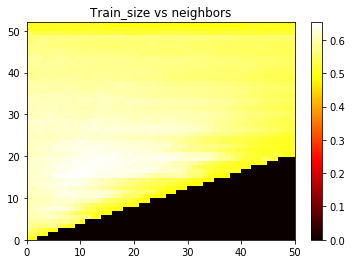

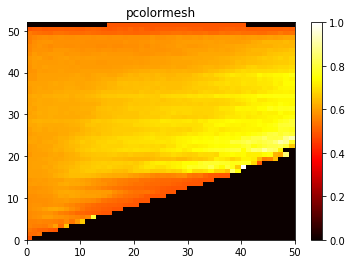

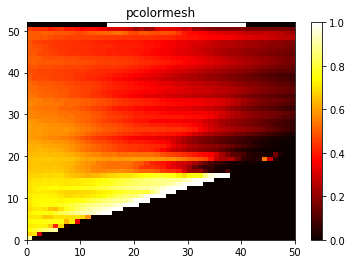

In [10]:
trainSizeRange = range(X_train.shape[0], 0, -120)
trainSizeRangeLength = len(trainSizeRange)
knnRange = range(2500, 0, -50)
knnRangeLength = len(knnRange)

print("Will have {} trainSize instances".format(trainSizeRangeLength))
print("Will have {} knn instances".format(knnRangeLength))

accColorMap = np.zeros(shape=(trainSizeRangeLength, len(knnRange)))
precColorMap = np.zeros(shape=(trainSizeRangeLength, len(knnRange)))
recColorMap = np.zeros(shape=(trainSizeRangeLength, len(knnRange)))

for i in range(0, len(trainSizeRange)):
    trainSize = trainSizeRange[i]
    pca = sentiment.PCA(min(i, 50))
    pca.fit(X_train[:trainSize])
    Xtc_train = pca.transform(X_train[:trainSize])
    Ytc_train = y_train[:trainSize]
    Xtc_test = pca.transform(X_test)
    print("Finished training PCA train_size = {}".format(trainSize))

    for j in range(0, knnRangeLength):
        k = knnRange[j]
        if (k <= trainSize):
            clf = sentiment.KNNClassifier(k)
            clf.fit(Xtc_train, Ytc_train)
            preds = clf.predict(Xtc_test)
            acc, prec, rec = getMetrics(preds, y_test)
            accColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = acc
            precColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = prec
            recColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = rec
            print("Finished k = {}, train_size = {}".format(k, trainSize))
        else:
            accColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = 0
            precColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = 0
            recColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = 0

saveData("accColorMap", accColorMap)
saveData("precColorMap", precColorMap)
saveData("recColorMap", recColorMap)
        
fig, ax = plt.subplots()

c = ax.pcolormesh(accColorMap, cmap='hot')
ax.set_title('Train_size vs neighbors')
# set the limits of the plot to the limits of the data
ax.axis([0, accColorMap.shape[1], 0, accColorMap.shape[0]])
fig.colorbar(c, ax=ax)

fig2, ax2 = plt.subplots()

c2 = ax2.pcolormesh(precColorMap, cmap='hot')
ax2.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax2.axis([0, precColorMap.shape[1], 0, precColorMap.shape[0]])
fig2.colorbar(c2, ax=ax2)

fig3, ax3 = plt.subplots()

c3 = ax3.pcolormesh(recColorMap, cmap='hot')
ax3.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax3.axis([0, recColorMap.shape[1], 0, recColorMap.shape[0]])
fig3.colorbar(c3, ax=ax3)

plt.show()

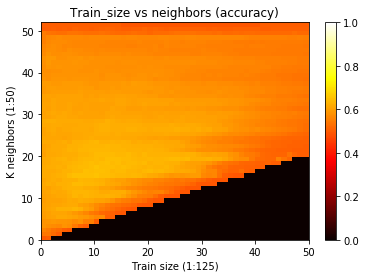

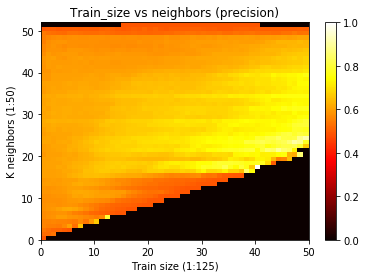

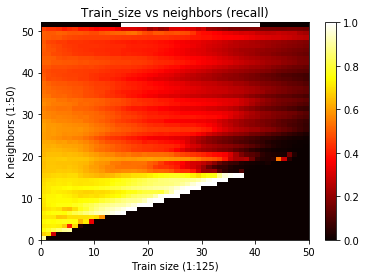

In [26]:
fig, ax = plt.subplots()

c = ax.pcolormesh(accColorMap, cmap='hot', vmin=0, vmax=1)
ax.set_title('Train_size vs neighbors (accuracy)')
# set the limits of the plot to the limits of the data
ax.axis([0, accColorMap.shape[1], 0, accColorMap.shape[0]])
ax.set_xlabel("Train size (1:125)")
ax.set_ylabel("K neighbors (1:50)")
fig.colorbar(c, ax=ax)

fig2, ax2 = plt.subplots()

c2 = ax2.pcolormesh(precColorMap, cmap='hot', vmin=0, vmax=1)
ax2.set_title('Train_size vs neighbors (precision)')
# set the limits of the plot to the limits of the data
ax2.axis([0, precColorMap.shape[1], 0, precColorMap.shape[0]])
ax2.set_xlabel("Train size (1:125)")
ax2.set_ylabel("K neighbors (1:50)")
fig2.colorbar(c2, ax=ax2)

fig3, ax3 = plt.subplots()

c3 = ax3.pcolormesh(recColorMap, cmap='hot', vmin=0, vmax=1)
ax3.set_title('Train_size vs neighbors (recall)')
# set the limits of the plot to the limits of the data
ax3.axis([0, recColorMap.shape[1], 0, recColorMap.shape[0]])
ax3.set_xlabel("Train size (1:125)")
ax3.set_ylabel("K neighbors (1:50)")
fig3.colorbar(c3, ax=ax3)

plt.show()